In [143]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression #

In [144]:
import warnings
warnings.filterwarnings('ignore') #ignoring some deprication warnings

In [145]:
# load dataset

data = pd.read_csv('customer_churn_dataset-testing-master.csv')

data.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [146]:
# print the shape of the dataset
print("Dataset shape:", data.shape)

Dataset shape: (64374, 12)


In [147]:
# check data for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [148]:
# feature matrix and target vector
X = data.drop(columns=["CustomerID", "Churn"]) #We remove CustomerID because it isn't useful for the model
y = data["Churn"]

print(X.head())
print("")
print(y.head())

   Age  Gender  Tenure  Usage Frequency  Support Calls  Payment Delay  \
0   22  Female      25               14              4             27   
1   41  Female      28               28              7             13   
2   47    Male      27               10              2             29   
3   35    Male       9               12              5             17   
4   53  Female      58               24              9              2   

  Subscription Type Contract Length  Total Spend  Last Interaction  
0             Basic         Monthly          598                 9  
1          Standard         Monthly          584                20  
2           Premium          Annual          757                21  
3           Premium       Quarterly          232                18  
4          Standard          Annual          533                18  

0    1
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64


In [149]:
# Implementing Logistic Regression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Begin by preprocessing the categorical features
categorical_features = ["Gender", "Subscription Type", "Contract Length"]

# We use a column transformer to apply OneHotEncoder
preprocessor_lr = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="passthrough"
)

# Now we use a pipeline to apply the preprocessing
pipeline_lr = Pipeline(steps=[
    ("preprocessor", preprocessor_lr),
    ("classifier", LogisticRegression(max_iter=1000, random_state=42))
])

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
pipeline_lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate the model
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      6793
           1       0.82      0.83      0.82      6082

    accuracy                           0.83     12875
   macro avg       0.83      0.83      0.83     12875
weighted avg       0.83      0.83      0.83     12875



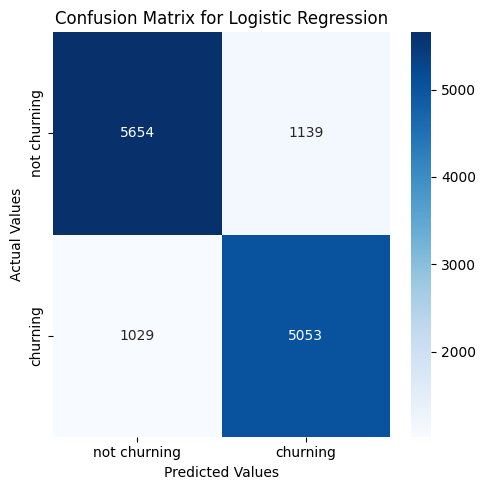

In [150]:
# We draw the confusion matrix to visualize our results
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_pred_lr)
fig, axes = plt.subplots(figsize=(5,5))
 
sns.heatmap(cm_lr, xticklabels=['not churning', 'churning'], 
            yticklabels=['not churning', 'churning'], 
            cmap='Blues', annot=True, fmt='d', ax=axes)

axes.set_title('Confusion Matrix for Logistic Regression')
axes.set_xlabel('Predicted Values')
axes.set_ylabel('Actual Values')

plt.tight_layout()
plt.show()

# RANDOM FOREST #

In [151]:
#After some testing, we found that the "Payment Delay" column was causing data leakage and needed to be removed

X = data.drop(columns=["CustomerID", "Churn", "Payment Delay"])
y = data["Churn"]

In [152]:
#Now we create the new pipeline, this time for RandomForest
from sklearn.ensemble import RandomForestClassifier

# Define categorical columns again
categorical_features = ["Gender", "Subscription Type", "Contract Length"]

# ColumnTransformer for OneHotEncoding
preprocessor_rf = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features)
    ],
    remainder="passthrough"
)

pipeline_rf = Pipeline(steps=[
    ("preprocessor", preprocessor_rf),
    ("classifier", RandomForestClassifier(n_estimators=100, random_state=0))
])

In [153]:
#Fitting the data to the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the pipeline on the full training set
pipeline_rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = pipeline_rf.predict(X_test)

# Display Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.66      0.76      6793
           1       0.71      0.90      0.79      6082

    accuracy                           0.78     12875
   macro avg       0.80      0.78      0.78     12875
weighted avg       0.80      0.78      0.77     12875



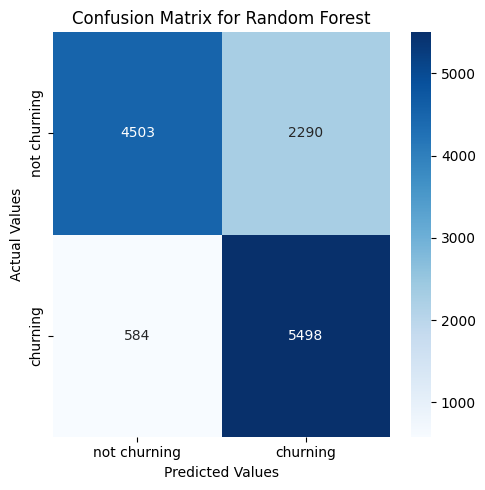

In [154]:
# Create the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, axes = plt.subplots(figsize=(5,5))
 
sns.heatmap(cm_rf, xticklabels=['not churning', 'churning'], 
            yticklabels=['not churning', 'churning'], 
            cmap='Blues', annot=True, fmt='d', ax=axes)

axes.set_title('Confusion Matrix for Random Forest')
axes.set_xlabel('Predicted Values')
axes.set_ylabel('Actual Values')

plt.tight_layout()
plt.show()

# SVC #

In [155]:
# Reinstating the original dataset with "Payment Delay" column
X = data.drop(columns=["CustomerID", "Churn"])
y = data["Churn"]

In [156]:
#Rebuilding our pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

categorical_features = ["Gender", "Subscription Type", "Contract Length"]

#This time we scale the features as SVC is very sensitive
preprocessor_svc = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first"), categorical_features),
    ],
    remainder=StandardScaler()
)

pipeline_svc = Pipeline(steps=[
    ("preprocessor", preprocessor_svc),
    ("classifier", SVC(kernel="rbf", random_state=0))
])

In [157]:
#Fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
pipeline_svc.fit(X_train, y_train)

# Predictions and evaluation
y_pred_svc = pipeline_svc.predict(X_test)
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95      6777
           1       0.93      0.96      0.94      6098

    accuracy                           0.95     12875
   macro avg       0.95      0.95      0.95     12875
weighted avg       0.95      0.95      0.95     12875



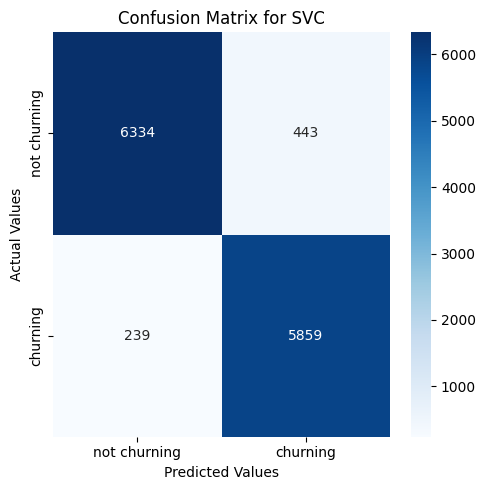

In [158]:
#Draw our confusion matrix
cm_svc = confusion_matrix(y_test, y_pred_svc)
fig, axes = plt.subplots(figsize=(5,5))
 
sns.heatmap(cm_svc, xticklabels=['not churning', 'churning'], 
            yticklabels=['not churning', 'churning'], 
            cmap='Blues', annot=True, fmt='d', ax=axes)

axes.set_title('Confusion Matrix for SVC')
axes.set_xlabel('Predicted Values')
axes.set_ylabel('Actual Values')

plt.tight_layout()
plt.show()

# Comparison of Results #

Results from Linear Regression: 
              precision    recall  f1-score   support

           0       0.52      0.51      0.52      6777
           1       0.47      0.47      0.47      6098

    accuracy                           0.49     12875
   macro avg       0.49      0.49      0.49     12875
weighted avg       0.49      0.49      0.49     12875


Results from RandomForest: 
              precision    recall  f1-score   support

           0       0.52      0.39      0.45      6777
           1       0.47      0.60      0.53      6098

    accuracy                           0.49     12875
   macro avg       0.50      0.50      0.49     12875
weighted avg       0.50      0.49      0.49     12875


Results from SVC: 
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      6777
           1       0.93      0.96      0.94      6098

    accuracy                           0.95     12875
   macro avg       0.95      0.95      0.95   